<a href="https://colab.research.google.com/github/mounabd/Personal_projects/blob/main/Pr%C3%A9dire_le_march%C3%A9_boursier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A retenir : 
- shift 
- dropna après rolling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udemy/sphist.csv', engine = 'python', index_col = 'Date')
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16590 entries, 2015-12-07 to 1950-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       16590 non-null  float64
 1   High       16590 non-null  float64
 2   Low        16590 non-null  float64
 3   Close      16590 non-null  float64
 4   Volume     16590 non-null  float64
 5   Adj Close  16590 non-null  float64
dtypes: float64(6)
memory usage: 1.5+ MB


In [ ]:
type(df.index[0])

str

In [ ]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-12-07', '2015-12-04', '2015-12-03', '2015-12-02',
               '2015-12-01', '2015-11-30', '2015-11-27', '2015-11-25',
               '2015-11-24', '2015-11-23',
               ...
               '1950-01-16', '1950-01-13', '1950-01-12', '1950-01-11',
               '1950-01-10', '1950-01-09', '1950-01-06', '1950-01-05',
               '1950-01-04', '1950-01-03'],
              dtype='datetime64[ns]', name='Date', length=16590, freq=None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16590 entries, 2015-12-07 to 1950-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       16590 non-null  float64
 1   High       16590 non-null  float64
 2   Low        16590 non-null  float64
 3   Close      16590 non-null  float64
 4   Volume     16590 non-null  float64
 5   Adj Close  16590 non-null  float64
dtypes: float64(6)
memory usage: 907.3 KB


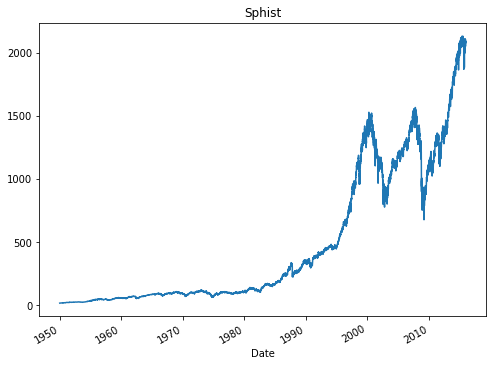

In [ ]:
df['Close'].plot(figsize = (8,6))
plt.title('Sphist');

In [ ]:
df = df.sort_values(axis = 0, by='Date')
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


In [ ]:
df['MA 5 Close'] = df['Close'].rolling(5).mean()
df['MA 30 Close'] = df['Close'].rolling(30).mean()
df['MA 365 Close'] = df['Close'].rolling(365).mean()
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close
Date,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9,NaN,NaN


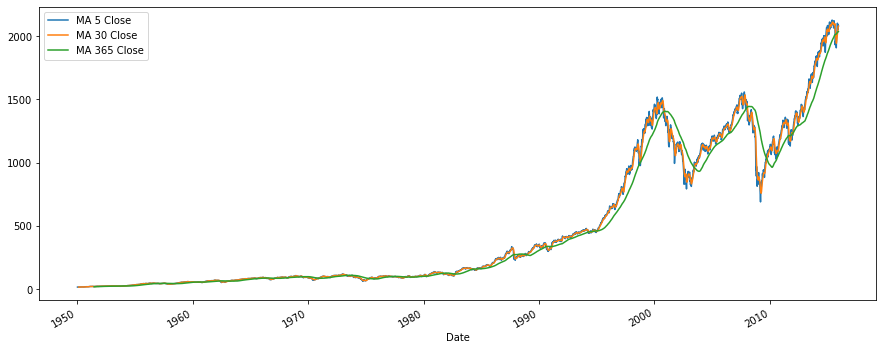

In [ ]:
df[['MA 5 Close', 'MA 30 Close', 'MA 365 Close']].plot(figsize = (15,6));


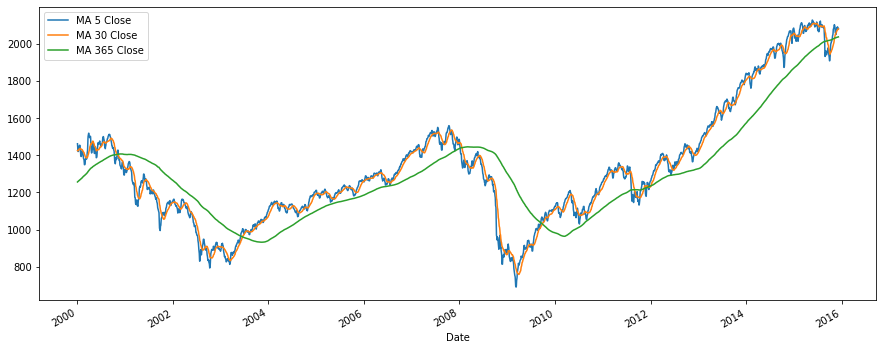

In [ ]:
df[['MA 5 Close', 'MA 30 Close', 'MA 365 Close']]['2000-01-01':].plot(figsize = (15,6));

In [ ]:
df['return'] = df['Close'].pct_change(1)
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return
Date,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,0.011405
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,0.004748
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,0.002953
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9,NaN,NaN,0.005889


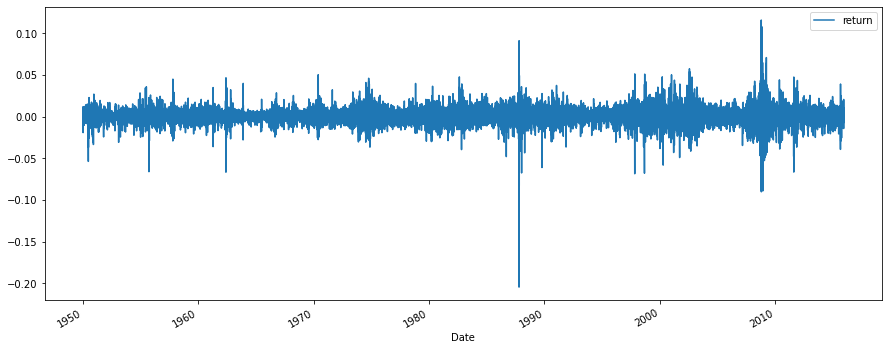

In [ ]:
df[['return']].plot(figsize = (15,6))

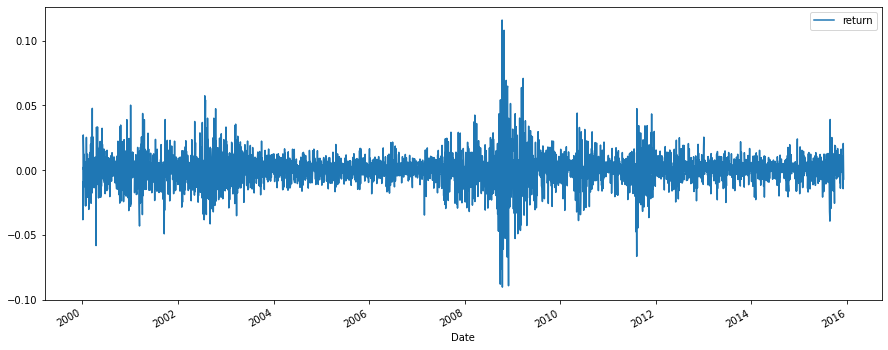

In [ ]:
df[['return']]['2000-01-01':].plot(figsize = (15,6))

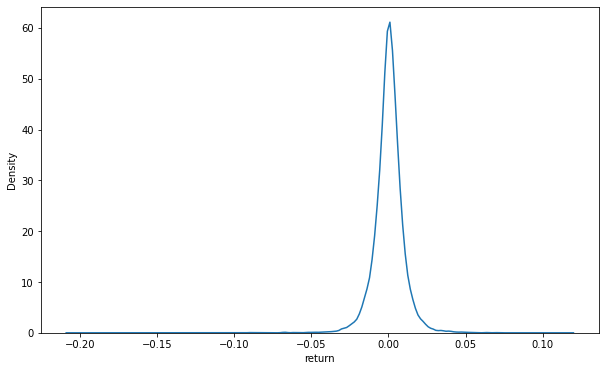

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['return']);

In [ ]:
df['cumulative_return'] = (1+df['return']).cumprod()
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return
Date,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,0.011405,1.011405
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,0.004748,1.016206
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,0.002953,1.019208
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9,NaN,NaN,0.005889,1.025210


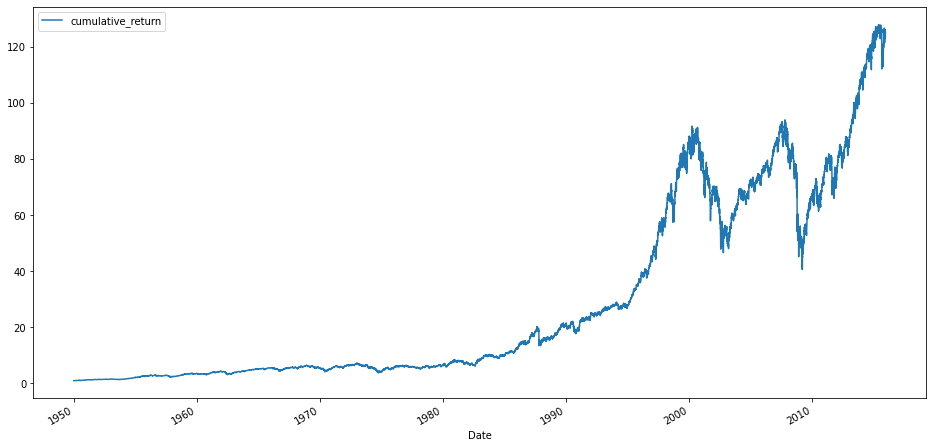

In [ ]:
df[['cumulative_return']].plot(figsize = (16,8))

In [ ]:
df['Day_week'] = df.index.dayofweek
df['Year'] = df.index.year
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Day_week,Year
Date,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,1,1950
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,0.011405,1.011405,2,1950
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,0.004748,1.016206,3,1950
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,0.002953,1.019208,4,1950
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9,NaN,NaN,0.005889,1.025210,0,1950


In [ ]:
df_dow = pd.get_dummies(df['Day_week'])
df_dow.head()

,0,1,2,3,4
Date,,,,,
1950-01-03,0,1,0,0,0
1950-01-04,0,0,1,0,0
1950-01-05,0,0,0,1,0
1950-01-06,0,0,0,0,1
1950-01-09,1,0,0,0,0


In [ ]:
df = pd.concat ( [df, df_dow], axis= 1)
df.drop( columns = 'Day_week' , inplace = True)
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Year,0,1,2,3,4
Date,,,,,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,1950,0,1,0,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,0.011405,1.011405,1950,0,0,1,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,0.004748,1.016206,1950,0,0,0,1,0
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,0.002953,1.019208,1950,0,0,0,0,1
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9,NaN,NaN,0.005889,1.025210,1950,1,0,0,0,0


In [ ]:
# déplacer la colonne MA 5 d'un jour, car la moyenne ne doit pas prendre en compte du jour à prédire, seulement les jours précédents

df['MA 5 Close'] = df['MA 5 Close'].shift(1)
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Year,0,1,2,3,4
Date,,,,,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,1950,0,1,0,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,0.011405,1.011405,1950,0,0,1,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,0.004748,1.016206,1950,0,0,0,1,0
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,0.002953,1.019208,1950,0,0,0,0,1
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,NaN,NaN,NaN,0.005889,1.025210,1950,1,0,0,0,0


In [ ]:
df.head(5)

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Year,0,1,2,3,4
Date,,,,,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,1950,0,1,0,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,0.011405,1.011405,1950,0,0,1,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,0.004748,1.016206,1950,0,0,0,1,0
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,0.002953,1.019208,1950,0,0,0,0,1
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,NaN,NaN,NaN,0.005889,1.025210,1950,1,0,0,0,0


# Séparer les données

In [ ]:
df = df.loc['1951-01-03' :]

In [ ]:
df.dropna(axis = 0)
df.head(5)

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Year,0,1,2,3,4
Date,,,,,,,,,,,,,,,,,
1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.360000,19.842666,NaN,-0.003852,1.241897,1951,0,0,1,0,0
1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.514000,19.874000,NaN,0.008700,1.252701,1951,0,0,0,1,0
1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.628000,19.907000,NaN,0.000000,1.252701,1951,0,0,0,0,1
1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.726001,19.935000,NaN,0.006229,1.260504,1951,1,0,0,0,0
1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.840001,19.961667,NaN,0.005714,1.267707,1951,0,1,0,0,0


In [ ]:
train = df.loc[:'2013-01-01']
test = df.loc['2013-01-01':]
print('Longeur du train:',len(train))
print('Longeur du test:',len(test))

Longeur du train: 15601
Longeur du test: 739


# Faire des prédictions


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Year,0,1,2,3,4
Date,,,,,,,,,,,,,,,,,
1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.360000,19.842666,NaN,-0.003852,1.241897,1951,0,0,1,0,0
1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.514000,19.874000,NaN,0.008700,1.252701,1951,0,0,0,1,0
1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.628000,19.907000,NaN,0.000000,1.252701,1951,0,0,0,0,1
1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.726001,19.935000,NaN,0.006229,1.260504,1951,1,0,0,0,0
1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.840001,19.961667,NaN,0.005714,1.267707,1951,0,1,0,0,0


In [ ]:
train.head()

,Open,High,Low,Close,Volume,Adj Close,MA 5 Close,MA 30 Close,MA 365 Close,return,cumulative_return,Year,0,1,2,3,4
Date,,,,,,,,,,,,,,,,,
1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.360000,19.842666,NaN,-0.003852,1.241897,1951,0,0,1,0,0
1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.514000,19.874000,NaN,0.008700,1.252701,1951,0,0,0,1,0
1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.628000,19.907000,NaN,0.000000,1.252701,1951,0,0,0,0,1
1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.726001,19.935000,NaN,0.006229,1.260504,1951,1,0,0,0,0
1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.840001,19.961667,NaN,0.005714,1.267707,1951,0,1,0,0,0


In [ ]:
# mesure de l'erreur avec MAE

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

features = ['MA 5 Close', 'Year', 0, 1, 2 , 3 , 4]

lr = LinearRegression()
lr.fit(train[features], train['Close'])
pred = lr.predict(test[features])

mae = mean_absolute_error(test['Close'], pred)

print(df.tail(1))
print(mae)

                   Open         High          Low        Close  ...  1  2  3  4
Date                                                            ...            
2015-12-07  2090.419922  2090.419922  2066.780029  2077.070068  ...  0  0  0  0

[1 rows x 17 columns]
16.335641055959265


In [ ]:
predicted = pd.DataFrame(pred, index = test.index, columns=['Predicted'])
predicted.head()

,Predicted
Date,
2013-01-02,1419.139304
2013-01-03,1426.296905
2013-01-04,1434.084841
2013-01-07,1443.737523
2013-01-08,1455.703206


In [ ]:
predicted = pd.concat([predicted, test['Close']], axis=1)
predicted.head()

,Predicted,Close
Date,,
2013-01-02,1419.139304,1462.420044
2013-01-03,1426.296905,1459.369995
2013-01-04,1434.084841,1466.469971
2013-01-07,1443.737523,1461.890015
2013-01-08,1455.703206,1457.150024


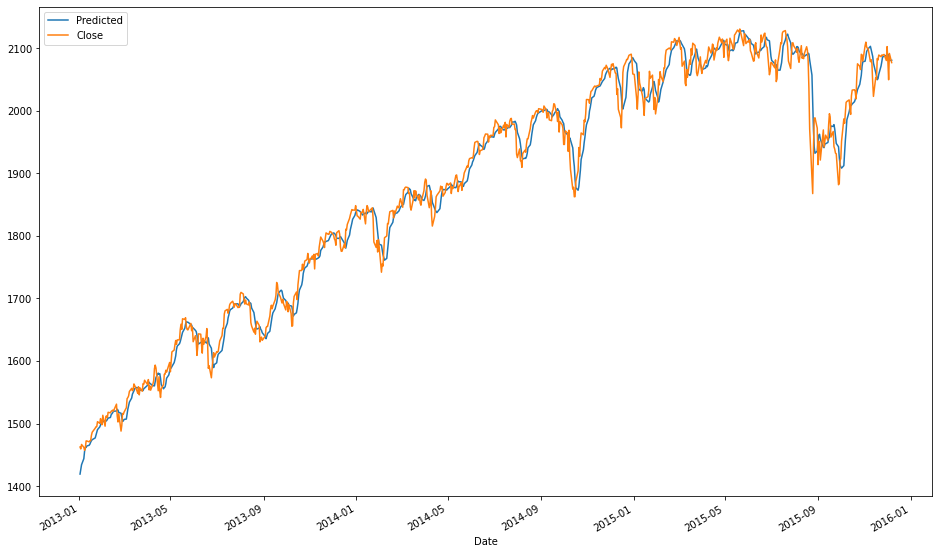

In [ ]:
predicted[['Predicted', 'Close']].plot(figsize = (16, 10));

# Améliorer le modèle

In [ ]:
df['5 day High'] = df['High'].rolling(5).mean().shift(1)
df['5 day Low']  = df['Low'].rolling(5).mean().shift(1)
df['5 day Volume'] = df['Volume'].rolling(5).mean().shift(1)
df['5 day Open'] = df['Open'].rolling(5).mean().shift(1)

In [ ]:
df.dropna(axis=0, inplace = True)

In [ ]:
train = df.loc[:'2013-01-01']
test = df.loc['2013-01-01':]
print('Longeur du train:',len(train))
print('Longeur du test:',len(test))

Longeur du train: 15487
Longeur du test: 739


In [ ]:
features = ['5 day High', '5 day Low', '5 day Volume','5 day Open', 'Year', 0, 1, 2, 3, 4]
lr = LinearRegression()
lr.fit(train[features], train['Close'])
pred = lr.predict(test[features])
mae = mean_absolute_error(test['Close'], pred)
print('Le score du modèle amélioré', mae)


Le score du modèle amélioré 14.602229853263538


In [ ]:
predicted = pd.DataFrame( {'predicted': pred , 'Actual' : test['Close']})
predicted.head()

,predicted,Actual
Date,,
2013-01-02,1409.294695,1462.420044
2013-01-03,1429.902006,1459.369995
2013-01-04,1438.455821,1466.469971
2013-01-07,1456.820645,1461.890015
2013-01-08,1469.353900,1457.150024


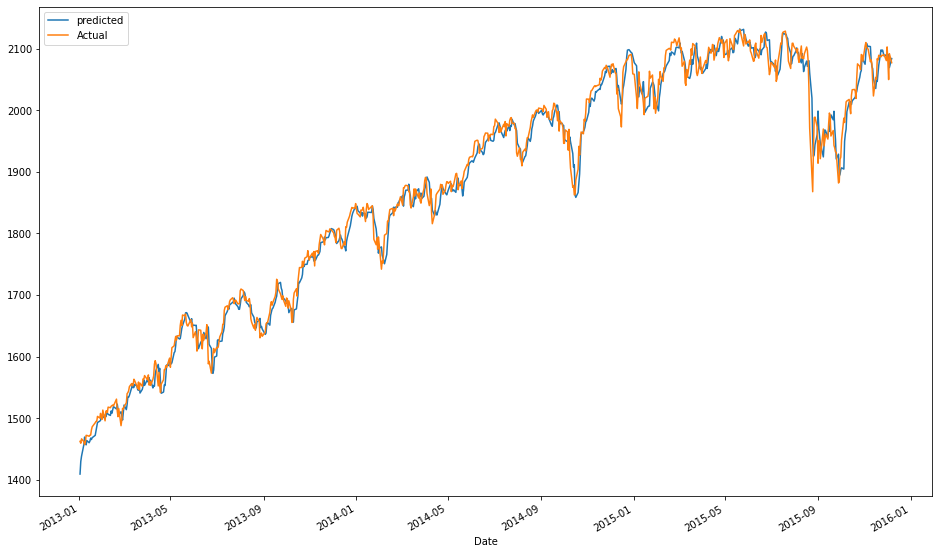

In [ ]:
predicted[['predicted', 'Actual']].plot(figsize = (16, 10));

# Piste d'amélioration du modèle

In [ ]:
# Random Forest
# météo externe à NY
# volume d'activité Tweeter
# récuperer en temps réel les données à chaque heure de fermeture
# prédiction horaire, par minute
# prédiction individiuelle au lieu de l'indice